# Programming Assignment 1: Point Inside Shape
## Members: Andy Dao, Mikhail Filippov, Patrick Saxton

In this assignment, we are to solve a computation problem of detecting if a given point is inside a shape, and write the algorithm associated with that solution. We are then to analyze the algorithm through a series of techniques learned in class, include testing, proving correctness, and solving for running time.

### Computational Problem Statement
Description: Given a sequence of $n$ number of vertices representing a simple shape or complex polygon, 
determine if a given point $p$ is within the boundaries of the shape defined by the sequence.

Input: A point, $p = <x_p, y_p>$, representing a 2D point and a sequence $S = <p_0, p_1, ..., p_{n-1}>$ where $n$ is the number of vertices represented by each point in the sequence $S$, where $p_k \in S$ for some $0 \le k < n$, $p_k = <x_k,y_k>$ where $x_k$ 
and $y_k$ are the x and y values for a given point.

Output: A boolean, if the given point $p$ is inside the shape defined by the sequence $S$.

### Decision Rule Description
To determine if a point, $p$, is inside our shape defined by the sequence $S$, we will observe how 
often a line cast in one direction from the point $p$ to the boundary of the shape will intersect the shape 
boundaries. If this line intersects the shape's boundaries an odd number of times, the point is 
within the shape. Otherwise, if the line intersects the shape's boundaries and even number of 
times, the point is outside of the shape.

## Examples
![concave-convex-example.png](concave-convex-example.png)

Observe here for both convex and concave shapes that for a given point inside the shape, a line 
cast to the farthest right boundary shall intersect the shape's boundaries an odd amount of times
to determine if it is inside of the shape.

Similarly, points outside of the shape intersect the shape an odd amount of times when a line is 
cast from the point to the farthest right boundary of the shape.

Here, we can observe that when the line cast from the point intersects a boundary, the line enters
a new boundary and that when it intersects the boundary again, it has re-entered the shape. 
Therefore, if the number of intersections if odd, it implies that the line was cast from within
the shape. This also implies that if the number of intersections was even, then the line was cast
from outside the shape.

In [26]:
#imports
import dill

In [2]:
# load session
# run if loading saved session
dill.load_session('notebook.db')

### Pseudocode
```plaintext
FUNCTION SegmentCheck(p1, p2, p):
    IF (p.x < MIN(p1.x, p2.x) OR p.x > MAX(p1.x, p2.x) OR
        p.y < MIN(p1.y, p2.y) OR p.y > MAX(p1.y, p2.y)) THEN
        RETURN False
    END IF

    IF p1.x == p2.x THEN
        RETURN (p.x == p1.x)
    END IF

    IF p1.y == p2.y THEN
        RETURN (p.y == p1.y)
    END IF

    IF (p.x - p1.x) * (p2.y - p1.y) == (p.y - p1.y) * (p2.x - p1.x) THEN
        RETURN True
    ELSE
        RETURN False
    END IF
END FUNCTION


FUNCTION CheckIntersection(p1, p2, x, y):
    IF ( (p1.y > y AND p2.y > y) OR (p1.y <= y AND p2.y <= y) ) THEN
        RETURN False
    END IF

    x_intersection = p1.x + (y - p1.y) * (p2.x - p1.x) / (p2.y - p1.y)

    RETURN (x <= x_intersection)
END FUNCTION


FUNCTION PointInPolygon(point, polygon):
    IF (LENGTH(polygon) < 3) THEN
        RAISE ERROR "The list of polygon points must have at least 3 points"
    END IF

    inside = False
    num_vertices = LENGTH(polygon)
    (x, y) = (point.x, point.y)
    p1 = polygon[0]

    FOR i FROM 1 TO num_vertices:
        p2 = polygon[i MOD num_vertices]

        IF PointOnSegment(p1, p2, point) THEN
            RETURN False
        END IF

        IF CheckIntersection(p1, p2, x, y) THEN
            inside = NOT inside
        END IF

        p1 = p2
    END FOR

    RETURN inside
END FUNCTION
```

## Algorithm Correctness
<!-- Something about Jordan Curve Theorem -->
Loop Invariant: $\forall 0 \leq j < i$, `inside` is true if the number of intersections for all line 
segments $p_j \in S$ from the given point $p$ is odd;  
so, `inside` $\iff$ `intersections` $\bmod 2 \ne 0$

Using this loop invariant, we can identify that whenever an intersection between the casted line and
a line segment formed between points of a shape is found, the algorithm accounts for this being 
becoming true or false based off its previous state. In total, the algorithm preserves the number 
of intersections through a boolean consistently. As such, we can identify through this algorithm in
the end result if a line casted from the point to a point beyond the shape will intersect the 
boundaries of the shape an even or odd number of times which will identify if the point is outside 
of the shape or inside the shape respectively.

---
#### Initialization:
`inside = False`, showing no intersections have been made; this is an inherently true statement as we have just entered the loop, meaning `intersections` $\bmod 2 \ne 0$ is also `False`

---
#### Maintenance:
1. Case 1:

If point $p$ is on an edge, `PointOnSegment()` passes and the function returns. We can still see that the invariant is still true, as `inside = False` and `intersections` $\bmod 2 \ne 0$ is also `False`.

2. Case 2:  

If the point $p$ is elsewhere on our grid, `CheckIntersection()` correctly identifies if an edge has been crossed by the cast of a line from point $p$. As such, `inside` will be toggled, and `intersections` will increment. This proves the relationship `inside` $\iff$ `intersections` $\bmod 2 \ne 0$ as `inside` toggling is directly tied to the parity of `intersections`, with `True` tied to `Odd` and `False` tied to `Even`.

---
#### Termination:
The `for` loop *must* terminate as it goes to a finite number `num_vertices`, proving that the loop eventually terminates and the function returns.

---

### Algorithm Implemented:

In [27]:
from typing import List, Tuple

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

def point_on_segment(p1: Point, p2: Point, p: Point) -> bool:
    if not (min(p1.x, p2.x) <= p.x <= max(p1.x, p2.x) and min(p1.y, p2.y) <= p.y <= max(p1.y, p2.y)):
        return False

    if p1.x == p2.x:
        return p.x == p1.x
    if p1.y == p2.y:
        return p.y == p1.y

    return (p.x - p1.x) * (p2.y - p1.y) == (p.y - p1.y) * (p2.x - p1.x)

def check_intersection(p1: Point, p2: Point, x: float, y: float) -> bool:
    if (p1.y > y) == (p2.y > y):
        return False

    x_intersection = p1.x + (y - p1.y) * (p2.x - p1.x) / (p2.y - p1.y)

    return x <= x_intersection

def point_in_polygon(point: Point, polygon: List[Point]) -> bool:
    if len(polygon) < 3:
        raise ValueError("The list of polygon points must have at least 3 points")

    num_of_vertices = len(polygon)
    x, y = point.x, point.y
    inside = False

    p1 = polygon[0]

    for i in range(1, num_of_vertices + 1):
        p2 = polygon[i % num_of_vertices]

        if point_on_segment(p1, p2, point):
            return False

        if check_intersection(p1, p2, x, y):
            inside = not inside

        p1 = p2

    return inside

### Testing Suite:

In [28]:
import unittest

class TestGeometry(unittest.TestCase):

    def test_point_inside_polygon(self):
        polygon = [Point(0, 0), Point(4, 0), Point(4, 4), Point(0, 4)]
        point = Point(2, 2)
        self.assertTrue(point_in_polygon(point, polygon))

    def test_point_outside_polygon(self):
        polygon = [Point(0, 0), Point(4, 0), Point(4, 4), Point(0, 4)]
        point = Point(5, 5)
        self.assertFalse(point_in_polygon(point, polygon))

    def test_point_on_edge_of_polygon(self):
        polygon = [Point(0, 0), Point(4, 0), Point(4, 4), Point(0, 4)]
        point = Point(4, 2)
        self.assertFalse(point_in_polygon(point, polygon))

    def test_polygon_with_less_than_three_points(self):
        polygon = [Point(0, 0), Point(4, 0)]
        point = Point(2, 2)
        with self.assertRaises(ValueError):
            point_in_polygon(point, polygon)

    def test_point_on_horizontal_segment(self):
        p1 = Point(0, 0)
        p2 = Point(4, 0)
        p = Point(2, 0)
        self.assertTrue(point_on_segment(p1, p2, p))

    def test_point_on_vertical_segment(self):
        p1 = Point(0, 0)
        p2 = Point(0, 4)
        p = Point(0, 2)
        self.assertTrue(point_on_segment(p1, p2, p))

    def test_point_on_diagonal_segment(self):
        p1 = Point(0, 0)
        p2 = Point(4, 4)
        p = Point(2, 2)
        self.assertTrue(point_on_segment(p1, p2, p))

    def test_point_not_on_segment(self):
        p1 = Point(0, 0)
        p2 = Point(4, 4)
        p = Point(3, 2)
        self.assertFalse(point_on_segment(p1, p2, p))

    def test_point_outside_segment_bounds(self):
        p1 = Point(0, 0)
        p2 = Point(4, 4)
        p = Point(5, 5)
        self.assertFalse(point_on_segment(p1, p2, p))

    def test_intersection_within_bounds(self):
        p1 = Point(0, 0)
        p2 = Point(4, 4)
        self.assertTrue(check_intersection(p1, p2, 2, 2))

    def test_intersection_outside_bounds(self):
        p1 = Point(0, 0)
        p2 = Point(4, 4)
        self.assertFalse(check_intersection(p1, p2, 5, 5))

    def test_intersection_on_horizontal_edge(self):
        p1 = Point(0, 0)
        p2 = Point(4, 0)
        self.assertFalse(check_intersection(p1, p2, 2, 0))

    def test_point_inside_concave_polygon(self):
        polygon = [Point(0, 0), Point(4, 0), Point(4, 4), Point(2, 2), Point(0, 4)]
        point = Point(1, 1)
        self.assertTrue(point_in_polygon(point, polygon))

    def test_point_outside_concave_polygon(self):
        polygon = [Point(0, 0), Point(4, 0), Point(4, 4), Point(2, 2), Point(0, 4)]
        point = Point(3, 3)
        self.assertFalse(point_in_polygon(point, polygon))

    def test_point_inside_complex_polygon(self):
        polygon = [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)]
        point = Point(2, 2)
        self.assertTrue(point_in_polygon(point, polygon))

    def test_point_outside_complex_polygon(self):
        polygon = [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)]
        point = Point(5, 5)
        self.assertFalse(point_in_polygon(point, polygon))

    def test_point_on_edge_complex_polygon(self):
        polygon = [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)]
        point = Point(2, 4)
        self.assertFalse(point_in_polygon(point, polygon))

    def test_point_on_vertex_complex_polygon(self):
        polygon = [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)]
        point = Point(2, 6)
        self.assertFalse(point_in_polygon(point, polygon))

    def test_point_near_edge_but_outside(self):
        polygon = [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)]
        point = Point(2, 6.1)
        self.assertFalse(point_in_polygon(point, polygon))

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

...................
----------------------------------------------------------------------
Ran 19 tests in 0.011s

OK


# Table of test cases
| Polygon                                                                                     | Point        | Description                                            | Expected Result | Actual Result |
|---------------------------------------------------------------------------------------------|--------------|--------------------------------------------------------|-----------------|---------------|
| [Point(0, 0), Point(4, 0), Point(4, 4), Point(2, 2), Point(0, 4)]                           | Point(1,1)   | Point is inside the concave polygon                    | True            | true          |
| [Point(0, 0), Point(4, 0), Point(4, 4), Point(2, 2), Point(0, 4)]                           | Point(3,3)   | Point is outside the concave polygon                   | False           | false         |
| [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)] | Point(2,2)   | Point is inside the complex polygon                    | True            | true          |
| [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)] | Point(5,5)   | Point is outside the complex polygon                   | False           | false         |
| [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)] | Point(2,4)   | Point is on the edge of the complex polygon            | False            | false          |
| [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)] | Point(2,6)   | Point is on the vertex of the complex polygon          | False            | false          |
| [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)] | Point(2,6.1) | Point is near the edge but outside the complex polygon | False           | false         |

### General Form of Usage:

In [29]:
if __name__ == "__main__":
    test_point = Point(176, 100)

    polygon_points = [
        Point(186, 14),
        Point(186, 44),
        Point(175, 115),
        Point(175, 85)
    ]

    print("Point is inside the polygon" if point_in_polygon(test_point, polygon_points) else "Point is outside the polygon")

Point is inside the polygon


### Asymptotic Worst-Case Analysis
-------------------
Given the main function of the algorithm, `point_in_polygon()`, relies on helper functions, we must first analyze those:
- `point_on_segment()`: This function does not do anything demanding and runs in constant time, given that it is a series of `if` statements with calls to `min()` and `max()`, which also compare two objects in constant time. This gives this helper an O(1).
- `check_intersection()`: As with the above function, this function has even less instructions; it includes simple `if` logic and addition and subtraction statements. This gives this helper an O(1).

With these in mind, we can now move on to `point_in_polygon()`. The function is as follows:

-------------------
```py
def point_in_polygon(point: Point, polygon: List[Point]) -> bool:
    if len(polygon) < 3:
        raise ValueError("The list of polygon points must have at least 3 points")

    num_of_vertices = len(polygon)
    x, y = point.x, point.y
    inside = False

    p1 = polygon[0]

```
-------------------
Up to this point, all operations above this statement have been constant time, so we can reduce them to O(1).

-------------------

```py
    for i in range(1, num_of_vertices + 1):
        p2 = polygon[i % num_of_vertices]

        if point_on_segment(p1, p2, point):
            return True

        if check_intersection(p1, p2, x, y):
            inside = not inside

        p1 = p2

    return inside
```
-------------------
We can see the above `for` loop runs for *n* number of times, where *n* represents the number of vertices on the bounding shape. Because we have stated that both `point_on_segment()` and `check_intersection()` are O(1), we know that there are no more statements within this `for` loop that will raise the time any more.

#### **Therefore, the worst-case of our function is O(n).**

-------------------

### Benchmarking:

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import random
from scipy.stats import linregress

In [31]:
def benchmark(point: Point, points: List[Point]):
    start = time.perf_counter()
    point_in_polygon(point, points)
    end = time.perf_counter()
    return (end - start)

In [36]:
test_point = Point(100, 100)
n = [5+1000*x for x in range(101)]
times = []
for i in tqdm(n):
    random_x = random.randint(0, 200)
    random_y = random.randint(0, 200)
    points = [Point(random_x, random_y) for x in range(i)]
    times.append(benchmark(test_point, points))

100%|██████████| 101/101 [00:07<00:00, 12.89it/s]


Text(0.5, 1.0, 'Performance of the point_in_polygon function')

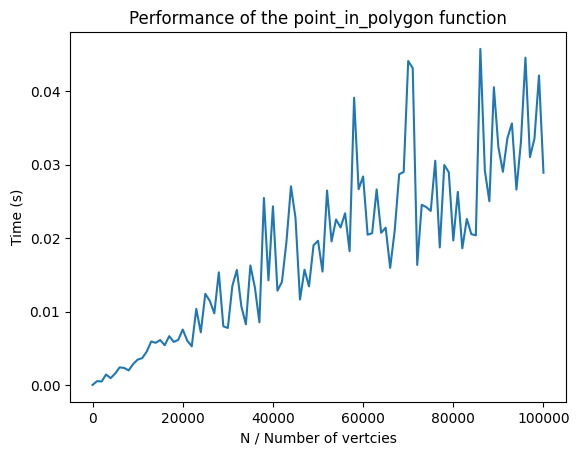

In [37]:
plt.plot(n, times)
plt.xlabel("N / Number of vertcies")
plt.ylabel("Time (s)")
plt.title("Performance of the point_in_polygon function")

In [39]:
data = pd.DataFrame({"n": n, "time": times})
print("Data Table for N vs Time")
data

Data Table for N vs Time


,n,time
0,5,0.000018
1,1005,0.000540
2,2005,0.000481
3,3005,0.001434
4,4005,0.000937
...,...,...
96,96005,0.044584
97,97005,0.031040
98,98005,0.033575
99,99005,0.042152


In [40]:
# Estimate the slope of a linear regression on our benchmarking
slope, intercept, r_value, p_value, std_err = linregress(np.log(n), np.log(times))
print(f"Estimated slope: {slope}")

Estimated slope: 0.8747440138895451


### Benchmarking Comparison
With our theoretical run-time of **O(n)**, we can compare that to what our benchmark results produced. We can see that the **slope** calculated from the fitted linear regression is < 1. As such, we know that the benchmark ran **sub-linearly**, yet close to linear.

This can hold up with our theoretical **O(n)**, as O notation is an *upper* bound on time complexity. As such, it makes sense for an actual benchmark to show something slightly below that, validating our theoretical **O(n)**.

Furthermore on a side note, we can see that purely by visuals on the graph, there is a positive *linear* trend for the data points; as n increases, so does the time in a linear fashion.

In [41]:
# save session variables
dill.dump_session('notebook.db')